## Hate Content Detection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
#import dataset
dataset = pd.read_csv("labeled_data.csv")
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
#check correlation
dataset.corr()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
Unnamed: 0,1.000000,0.023947,-0.054345,0.043773,-0.005187,0.024525
count,0.023947,1.000000,0.101926,0.534604,0.063326,-0.010029
hate_speech,-0.054345,0.101926,1.000000,-0.261808,-0.157599,-0.515732
offensive_language,0.043773,0.534604,-0.261808,1.000000,-0.684406,-0.410440
neither,-0.005187,0.063326,-0.157599,-0.684406,1.000000,0.800687
class,0.024525,-0.010029,-0.515732,-0.410440,0.800687,1.000000


In [ ]:
#inplace = apply changes in original dataset
dataset.rename(columns={'Unnamed: 0' : 'index'}, inplace=True)
dataset.head()

,index,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
# add tweet length column up
dataset['tweet_length'] = dataset['tweet'].apply(len)
dataset.head()

,index,count,hate_speech,offensive_language,neither,class,tweet,tweet_length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


## Basic Data visualizations

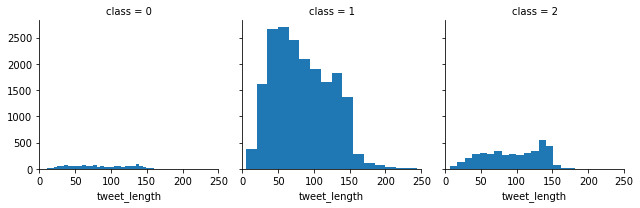

In [ ]:
#FacetGrid
graph = sns.FacetGrid(data=dataset, col='class')
plt.xlim([0, 250])
graph.map(plt.hist, 'tweet_length', bins=50)

<p> Number of tweets seem to be skewed a lot higher towards the class=1 (offensive language)

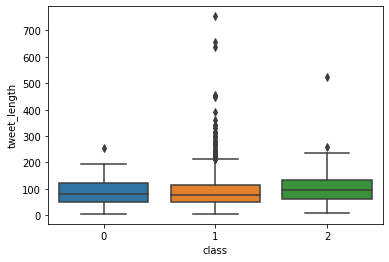

In [ ]:
#Box-plot visvualization
sns.boxplot(x='class', y='tweet_length', data=dataset)

<p>class-1 tweets have much longer text. There are also outliers present so text-length won’t be a useful feature to consider.

([<matplotlib.axis.XTick at 0x7f762bf074d0>,
 <a list of 3 Text major ticklabel objects>)

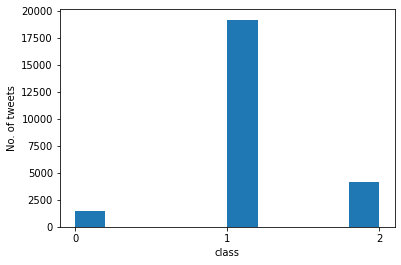

In [ ]:
#histogram

class_min = dataset['class'].min()
class_max = dataset['class'].max()
dataset['class'].astype(str) # Prevents conversion to float
dataset['class'].hist()
plt.grid(False)
plt.xlabel('class')
plt.ylabel('No. of tweets')
plt.xticks(range(class_min, class_max + 1, 1))

<p> The above histogram shows that most of the tweets are considered to be offensive words by the CF coders.

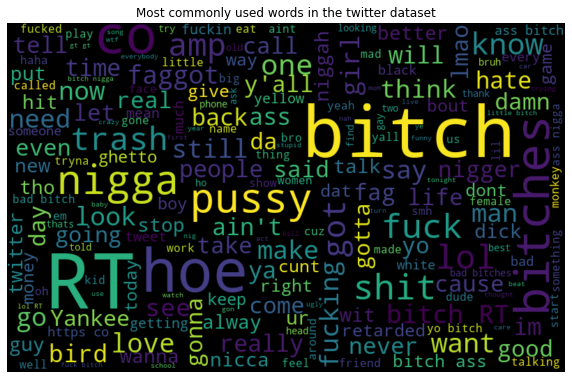

In [ ]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
# imshow-Display data as an image
all_words = ' '.join([text for text in dataset['tweet'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most commonly used words in the twitter dataset")
plt.show()

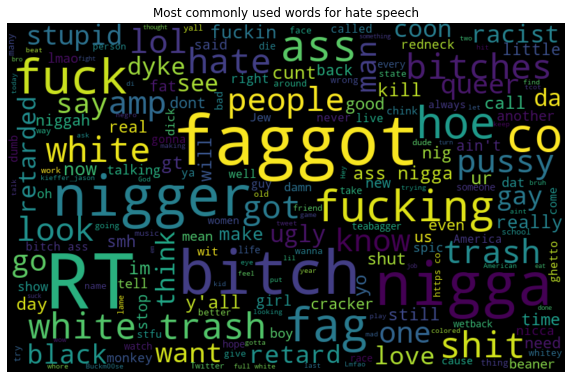

In [ ]:
# visualizing which of the word is most commonly used for hatred speech
hatred_words = ' '.join([text for text in dataset['tweet'][dataset['class'] == 0]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most commonly used words for hate speech")
plt.show()

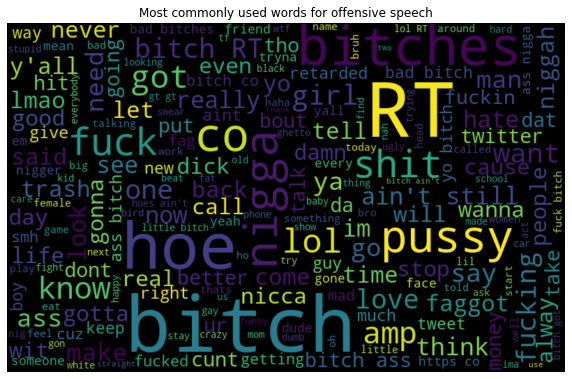

In [ ]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in dataset['tweet'][dataset['class'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most commonly used words for offensive speech")
plt.show()

In [ ]:
data = dataset[['class', 'tweet']]
y = data.iloc[:, :-1].values

In [ ]:
#Encode the dependent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

In [ ]:
print(y)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
#This data has been split into two variables that will be used to fit hate speech and offensive speech modules.
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])

In [ ]:
print(y_hate)
print(y_offensive)

[0. 0. 0. ... 0. 0. 0.]
[0. 1. 1. ... 1. 1. 0.]


In [ ]:
#clean tweets
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

corpus = []
for i in range(0, 24783):
  review = re.sub('[^a-zA-Z]', ' ', data['tweet'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['rt mayasolov woman complain clean hous amp man alway take trash', 'rt mleew boy dat cold tyga dwn bad cuffin dat hoe st place', 'rt urkindofbrand dawg rt sbabi life ever fuck bitch start cri confus shit', 'rt c g anderson viva base look like tranni', 'rt shenikarobert shit hear might true might faker bitch told ya', 'madison x shit blow claim faith somebodi still fuck hoe', 'brighterday not sit hate anoth bitch got much shit go', 'selfiequeenbri caus tire big bitch come us skinni girl', 'amp might not get ya bitch back amp that', 'rhythmixx hobbi includ fight mariam bitch', 'keek bitch curv everyon lol walk convers like smh', 'murda gang bitch gang land', 'hoe smoke loser yea go ig', 'bad bitch thing like', 'bitch get', 'bitch nigga miss', 'bitch plz whatev', 'bitch love', 'bitch get cut everyday b', 'black bottl amp bad bitch', 'broke bitch cant tell noth', 'cancel bitch li

In [ ]:
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(corpus).toarray()

In [ ]:
#splitting dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y_hate, test_size = 0.30, random_state = 0)

In [ ]:
#Saving the model
import pickle

In [ ]:
# svm_report = classification_report(y_test, y_pred_svm )
# print(svm_report)

### Logistic Regression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)
y_pred_lr = classifier_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
lr_score = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy score - ", lr_score)

[[6911   97]
 [ 347   80]]
Logistic Regression accuracy score -  0.9402824478816408


### Random Forest Classifier

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators = 100)
classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
rf_score = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy score - ", rf_score)

[[6861  147]
 [ 300  127]]
Random Forest accuracy score -  0.9398789509078682


### Naive Bayes

In [ ]:
classifier_np = GaussianNB()
classifier_np.fit(x_train, y_train)
y_pred_np = classifier_np.predict(x_test)
cm = confusion_matrix(y_test, y_pred_np)
print(cm)
np_score = accuracy_score(y_test, y_pred_np)
print("Naive Bayes accuracy score - ", np_score)

[[3289 3719]
 [ 168  259]]
Naive Bayes accuracy score -  0.4772024209818426


### SVM

In [ ]:
from sklearn import svm
classifier_svm = svm.SVC()
classifier_svm.fit(x_train, y_train)
y_pred_svm = classifier_svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
svm_score = accuracy_score(y_test, y_pred_svm)
print("SVM accuracy score - ", svm_score)

[[6964   44]
 [ 372   55]]
SVM accuracy score -  0.9440484196368527


### KNeighborsClassifier (KNN)

In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors=150) #thumb rule k = sqrt(n)
classifier_knn.fit(x_train, y_train)
y_pred_knn = classifier_knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
knn_score = accuracy_score(y_test, y_pred_knn)
print("KNeighborsClassifier accuracy score - ", knn_score)

[[7007    1]
 [ 427    0]]
KNeighborsClassifier accuracy score -  0.9424344317417619


### DecisionTree Classifier

In [ ]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(x_train, y_train)
y_pred_dt = classifier_dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
dt_score = accuracy_score(y_test, y_pred_dt)
print("DecisionTreeClassifier accuracy score - ", dt_score)

[[6685  323]
 [ 280  147]]
DecisionTreeClassifier accuracy score -  0.9188971082716879


### Calculating precision, recall and f1_score of each classifier

In [ ]:
svm_f1 = f1_score(y_pred_svm, y_test, average='weighted')
svm_recall = recall_score(y_pred_svm, y_test, average='weighted')
svm_precision = precision_score(y_pred_svm, y_test, average='weighted')

lr_f1 = f1_score(y_pred_lr, y_test, average='weighted')
lr_recall = recall_score(y_pred_lr, y_test, average='weighted')
lr_precision = precision_score(y_pred_lr, y_test, average='weighted')

np_f1 = f1_score(y_pred_np, y_test, average='weighted')
np_recall = recall_score(y_pred_np, y_test, average='weighted')
np_precision = precision_score(y_pred_np, y_test, average='weighted')

rf_f1 = f1_score(y_pred_rf, y_test, average='weighted')
rf_recall = recall_score(y_pred_rf, y_test, average='weighted')
rf_precision = precision_score(y_pred_rf, y_test, average='weighted')

dt_f1 = f1_score(y_pred_dt, y_test, average='weighted')
dt_recall = recall_score(y_pred_dt, y_test, average='weighted')
dt_precision = precision_score(y_pred_dt, y_test, average='weighted')

knn_f1 = f1_score(y_pred_knn, y_test, average='weighted')
knn_recall = recall_score(y_pred_knn, y_test, average='weighted')
knn_precision = precision_score(y_pred_knn, y_test, average='weighted')

In [ ]:
print("Classifier\t\t\tPrecision\t\t\tRecall\t\t\tf1_score\t\tAccuracy")
print("Support Vector Machine\t   ", svm_precision, "\t\t", svm_recall, "\t", svm_f1, "\t", svm_score)
print("Logistic Regression\t   ", lr_precision, "\t\t", lr_recall, "\t", lr_f1, "\t", lr_score)
print("Naive Bayes\t\t   ", np_precision, "\t\t", np_recall, "\t", np_f1, "\t", np_score)
print("Random Forest\t\t   ", rf_precision, "\t\t", rf_recall, "\t", rf_f1, "\t", rf_score)
print("DecisionTree Classifier\t   ", dt_precision, "\t\t", dt_recall, "\t", dt_f1, "\t", dt_score)
print("KNeighborsClassifier\t   ", knn_precision, "\t\t", knn_recall, "\t", knn_f1, "\t", knn_score)

Classifier			Precision			Recall			f1_score		Accuracy
Support Vector Machine	    0.9822047606872477 		 0.9440484196368527 	 0.9608536849566627 	 0.9440484196368527
Logistic Regression	    0.9671420661002861 		 0.9402824478816408 	 0.952117962139842 	 0.9402824478816408
Naive Bayes		    0.5427474336809174 		 0.4772024209818426 	 0.35517941395559527 	 0.4772024209818426
Random Forest		    0.9518506998199855 		 0.938399462004035 	 0.9444334013583779 	 0.938399462004035
DecisionTree Classifier	    0.9153712382706665 		 0.9188971082716879 	 0.9170779620489204 	 0.9188971082716879
KNeighborsClassifier	    0.9997228261370231 		 0.9424344317417619 	 0.9702337024744853 	 0.9424344317417619


### Comparing the classifiers

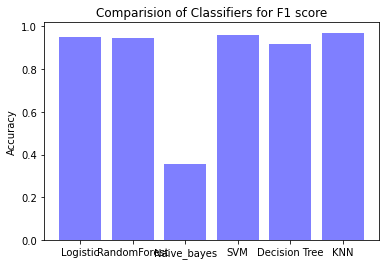

In [ ]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM', 'Decision Tree', 'KNN')
y_pos = np.arange(len(objects))
performance = [lr_f1, rf_f1, np_f1, svm_f1, dt_f1, knn_f1]
plt.bar(y_pos, performance, align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Comparision of Classifiers for F1 score')
plt.show()